In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
#conn = sqlite3.connect("car_sales.db")

df = pd.read_csv("Online_Cars_Sale_Marketplace_Data.csv")

#df.to_sql("car_sales", conn, if_exists="replace", index=False)

In [3]:
car_sales_df = pd.read_csv('./Online_Cars_Sale_Marketplace_Data.csv')

# Remove the dollar sign from the 'Price' column
car_sales_df['Price'] = car_sales_df['Price'].str.replace('$', '')

# Remove the comma from the 'Price' column
car_sales_df['Price'] = car_sales_df['Price'].str.replace(',', '')

# Remove the "Not Priced" from the 'Price' column
car_sales_df = car_sales_df[car_sales_df['Price']!= 'Not Priced']

# Turn 'Price' into all ints
car_sales_df['Price'] = car_sales_df['Price'].astype(int)

car_sales_df

#car_sales_df.info()

C:\Users\ufora\AppData\Local\Temp\ipykernel_6376\309230216.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_sales_df['Price'] = car_sales_df['Price'].str.replace('$', '')


,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27374,4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,61998,4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,26944,4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,28568,4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [4]:
#Question 2: Is there a premium for dealers selling their cars on this platform compared to private sellers?
    #Analyze the listing price between private sellers and dealers
        #Average price of all Hondas sold from dealers vs private
    #How to compare the listing prices apple to apple
        #By make
        #"avg price of all Hondas sold from dealer vs avg price of all Hondas sold privately"

In [5]:
#only Hondas sold by dealers
honda_dealer_cars = car_sales_df[(car_sales_df['Make'] == 'Honda') & (car_sales_df['SellerType'] == 'Dealer')]
#Avg price of the hondas sold by dealers
avg_price_honda_dealer_cars = honda_dealer_cars['Price'].mean()

print("The average price of all Honda cars sold from a dealer is $"+ str(round(avg_price_honda_dealer_cars, 2)))

The average price of all Honda cars sold from a dealer is $31658.53


In [6]:
#only Hondas sold privately
honda_private_cars = car_sales_df[(car_sales_df['Make'] == 'Honda') & (car_sales_df['SellerType'] == 'Private')]
#Avg price of the hondas sold by dealers
avg_price_honda_private_cars = honda_private_cars['Price'].mean()

print("The average price of all Honda cars sold privately is $"+ str(avg_price_honda_private_cars))

The average price of all Honda cars sold privately is $27816.333333333332


In [7]:
#printing out a brief answer to the question
print("Since the average price of a Honda sold from a dealer is $" + str(avg_price_honda_dealer_cars) + " while the average price of a Honda sold privately is only $" + str(avg_price_honda_private_cars) + ", we can see that there is a premium of about $" + str((avg_price_honda_dealer_cars-avg_price_honda_private_cars)) + " when buying from a dealer.")

Since the average price of a Honda sold from a dealer is $31658.530410183874 while the average price of a Honda sold privately is only $27816.333333333332, we can see that there is a premium of about $3842.1970768505416 when buying from a dealer.


In [8]:
#making lists to use as dataframe data
types_of_sellers_list = ['Dealer','Private']
avg_selling_price_list = [avg_price_honda_dealer_cars,avg_price_honda_private_cars]

#making a dataframe to use as graphing data
graph_df_data = {'SellerType':types_of_sellers_list,\
        'AvgHondaPrice':avg_selling_price_list}

graph_df = pd.DataFrame(graph_df_data)

graph_df

,SellerType,AvgHondaPrice
0,Dealer,31658.530410
1,Private,27816.333333


<AxesSubplot:xlabel='SellerType', ylabel='AvgHondaPrice'>

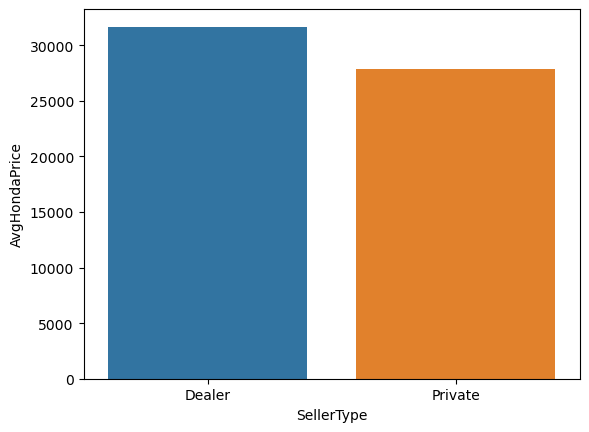

In [9]:
#a graph of average selling price from each type of seller
sns.barplot(data=graph_df, x='SellerType', y='AvgHondaPrice')

<AxesSubplot:xlabel='Price', ylabel='Make'>

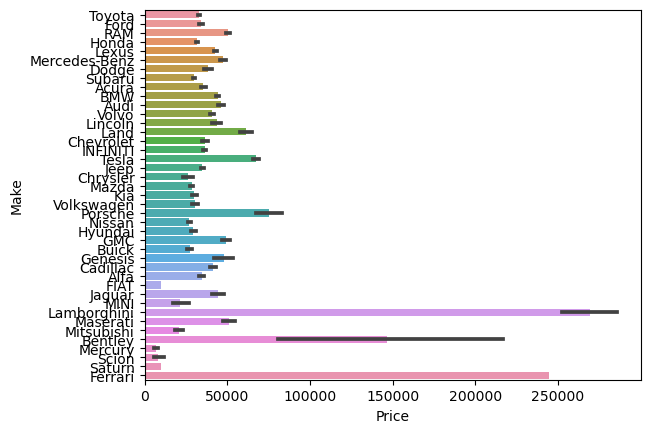

In [10]:
#other plots for fun
sns.barplot(x=car_sales_df['Price'], y=car_sales_df['Make'])